[<img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/logoinpe.png?raw=true" width = 500 align="left">](https://www.gov.br/inpe/pt-br)

[<img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/LogoCAP.png?raw=true" width = 300 align="right">](http://www.inpe.br/posgraduacao/cap/)

# **CAP-340 Problemas Inversos**
## **Esta atividade trata da identificação da condição inicial no problema de condução de calor em uma barra metálica usando um algoritmo genético (AG), em que para formulação do problema inverso, o problema é tratado como um problema de otimização**

**Docente:** *Prof. Dr. Haroldo Fraga de Campos Velho*

**Discente:** *Lourenço José Cavalcante Neto*

---


<img src="https://github.com/lourencocavalcante/CAP-340-Problemas-Inversos/blob/main/Exerc_parte1.PNG?raw=true" width = 800 align="center">
<img src="https://github.com/lourencocavalcante/CAP-340-Problemas-Inversos/blob/main/Exerc_parte2.PNG?raw=true" width = 800 align="center">

### O objetivo é calcular a evolução da temperatura ao longo da barra e compará-la com medições obtidas em sensores ao longo da barra. As medições são obtidas adicionando ruído uniforme às temperaturas simuladas

## 1. Resolver o problema direto da equação do calor

Para resolver este item, o código abaixo código implementa a solução do problema direto da equação do calor em uma barra de metal, utilizando o método de diferenças finitas. A equação diferencial parcial descrita modela a evolução temporal da temperatura ao longo da barra, considerando difusividade térmica constante e extremidades isoladas.

## Cálculo do ***T_mod*** (***Temperatura simulada***), para poder se ter a **T_obs** (***Temperatura observada***) usando a condição inicial:

### ***f(x) = sin(pi * x)***

Primeiramente, vamos importar as bibliotecas necessárias e definirmos os parâmetros da simulação do problema, icomo o número de intervalos espaciais, o número total de passos no tempo, o comprimento da barra, e os tamanhos dos passos espacial e temporal.

In [28]:
#Bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parâmetros do problema
Lx = 1.0          # Comprimento da barra
alpha = 0.01      # Difusividade térmica (m²/s)
dx = 0.1          # Passo espacial (Delta X) em metros
dt = 0.001        # Passo temporal (em segundos). Certificar-se de que Δt respeite a condição de estabilidade
tau = 0.01        # Tempo total da simulação (em segundos)

# Cálculo do número de pontos espaciais e passos de tempo
nx = int(Lx / dx) + 1     # Número de pontos espaciais
nt = int(tau / dt)        # Número de passos de tempo

# Definição do número de Courant
r = alpha * dt / dx**2    # Número de Courant (adimensional)


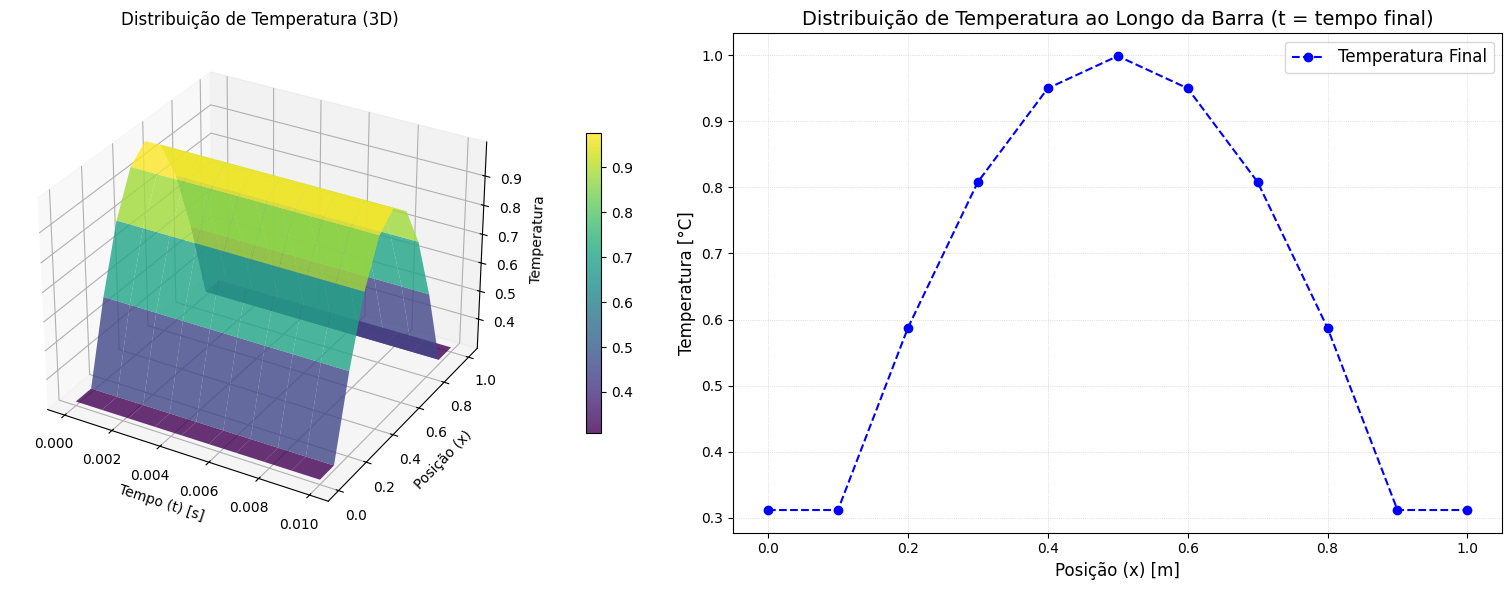

In [29]:
x = np.linspace(0.0, Lx, nx)  # Posições espaciais
t_values = np.linspace(0, tau, nt)  # Valores de tempo

T = np.zeros(nx, float)  # Temperatura inicial
T_new = np.zeros(nx, float)  # Nova temperatura

# Condição inicial: f(x) = sin(pi * x / Lx)
true_initial_condition = np.sin(np.pi * x / Lx)
T[:] = true_initial_condition

# Armazenamento da evolução das temperaturas ao longo do tempo
temperature_history = np.zeros((nt, nx))

# Diferenças finitas explícitas para resolver o problema
for n in range(nt):
    for i in range(1, nx - 1):  # Ignora as extremidades
        T_new[i] = T[i] + r * (T[i - 1] - 2 * T[i] + T[i + 1])

    # Condições de contorno (derivada zero nas extremidades)
    T_new[0] = T_new[1]  # Derivada zero na esquerda
    T_new[-1] = T_new[-2]  # Derivada zero na direita

    # Atualiza o valor de T para o próximo passo de tempo
    T[:] = T_new[:]
    temperature_history[n, :] = T  # Armazenar resultados

# Função para plotar 3D e 2D lado a lado
def plot_combined(x, t, Temp_all):
    """
    Plota a evolução da temperatura com gráficos 3D e 2D lado a lado.
    """
    X, T_mesh = np.meshgrid(x, t)

    fig = plt.figure(figsize=(16, 6))

    # Gráfico 3D
    ax1 = fig.add_subplot(121, projection='3d')
    surf = ax1.plot_surface(T_mesh, X, Temp_all, cmap='viridis', edgecolor='none', alpha=0.8)
    ax1.set_title('Distribuição de Temperatura (3D)', fontsize=12)
    ax1.set_xlabel('Tempo (t) [s]')
    ax1.set_ylabel('Posição (x)')
    ax1.set_zlabel('Temperatura')
    fig.colorbar(surf, ax=ax1, pad=0.1, shrink=0.6)

    # Gráfico 2D no estilo especificado
    ax2 = fig.add_subplot(122)
    final_temperature = Temp_all[-1, :]  # Temperatura no tempo final
    ax2.plot(
        x,
        final_temperature,
        color="blue",
        linestyle="--",
        marker="o",
        label="Temperatura Final"
    )
    ax2.set_xlabel("Posição (x) [m]", fontsize=12)
    ax2.set_ylabel("Temperatura [°C]", fontsize=12)
    ax2.set_title("Distribuição de Temperatura ao Longo da Barra (t = tempo final)", fontsize=14)
    ax2.grid(True, linestyle=":", linewidth=0.5, alpha=0.7)
    ax2.legend(loc="best", fontsize=12)
    plt.tight_layout()

    plt.show()

# Chamar a função para plotar os gráficos
plot_combined(x, t_values, temperature_history)

In [30]:
# Posições espaciais: gerar as posições espaciais a serem usadas na solução
x = np.linspace(0.0, Lx, nx)

T = np.zeros(nx)  # Temperatura inicial
T_new = np.zeros(nx)  # Nova temperatura

# Condição inicial: f(x) = sin(2 * x / Lx)
true_initial_condition = np.sin(np.pi * x / Lx)  # Condição inicial para usar na função
T[:] = true_initial_condition  # Inicializa as temperaturas

# Diferenças finitas explícitas para resolver o problema
for n in range(nt):
    for i in range(1, nx - 1):  # Ignora as extremidades
        T_new[i] = T[i] + r * (T[i - 1] - 2 * T[i] + T[i + 1])

    # Condições de contorno (derivada zero nas extremidades)
    T_new[0] = 0  # Derivada zero na esquerda (isolante)
    T_new[-1] = 0  # Derivada zero na direita (isolante)

    # Atualiza o valor de T para o próximo passo de tempo
    T[:] = T_new[:]

T[0] = 0  # Derivada zero na esquerda (isolante)
T[-1] = 0  # Derivada zero na direita (isolante)

# Agora, percorrendo todas as posições x para imprimir a temperatura simulada
for i, pos in enumerate(x):
    print(f'Temperatura simulada T_mod na posição x = {pos:.1f} é: {T[i]:.4f}')

Temperatura simulada T_mod na posição x = 0.0 é: 0.0000
Temperatura simulada T_mod na posição x = 0.1 é: 0.3087
Temperatura simulada T_mod na posição x = 0.2 é: 0.5872
Temperatura simulada T_mod na posição x = 0.3 é: 0.8082
Temperatura simulada T_mod na posição x = 0.4 é: 0.9501
Temperatura simulada T_mod na posição x = 0.5 é: 0.9990
Temperatura simulada T_mod na posição x = 0.6 é: 0.9501
Temperatura simulada T_mod na posição x = 0.7 é: 0.8082
Temperatura simulada T_mod na posição x = 0.8 é: 0.5872
Temperatura simulada T_mod na posição x = 0.9 é: 0.3087
Temperatura simulada T_mod na posição x = 1.0 é: 0.0000


In [31]:
# Função para resolver a equação do calor usando diferenças finitas explícitas
def solve_heat_equation(f, Lx, alpha, tau):
    """
    Resolve a equação do calor para condição inicial `f` e parâmetros:
    - Lx: comprimento da barra
    - alpha: difusividade térmica
    - tau: tempo total de simulação
    Retorna a temperatura final no tempo t = tau.
    """
    nx = len(f)                # Número de pontos espaciais
    dx = Lx / (nx - 1)         # Reajuste do passo espacial
    dt = 0.001  # Cálculo adaptativo do passo de tempo
    nt = int(tau / dt)         # Número total de passos de tempo
    r = alpha * dt / dx**2     # Número de Courant

    # Inicialização otimizada (somente dois vetores de estado)
    T_current = f.copy()
    T_next = np.zeros_like(T_current)

    # Iteração ao longo do tempo
    for n in range(nt):
        # Diferença finita para os pontos internos
        T_next[1:-1] = T_current[1:-1] + r * (T_current[:-2] - 2 * T_current[1:-1] + T_current[2:])

        # Condições de contorno
        '''T_next[0] = 0  # Derivada zero na esquerda (isolante)
        T_next[-1] = 0  # Derivada zero na direita (isolante)'''

        # Atualiza os vetores
        T_current, T_next = T_next, T_current  # Troca de valores para a próxima iteração

    return T_current  # Temperatura final após nt passos de tempo

# Solução do problema direto
final_temperature = solve_heat_equation(T, Lx, alpha, tau)  # Resolve a equação do calor com a condição inicial

final_temperature[0] = 0  # Derivada zero na esquerda (isolante)
final_temperature[-1] = 0  # Derivada zero na direita (isolante)

# Exibir o resultado
print("x       T(x)")
print("-" * 20)
for xi, Ti in zip(x, final_temperature):
    print(f"{xi:.4f}  {Ti:.4f}")

x       T(x)
--------------------
0.0000  0.0000
0.1000  0.3084
0.2000  0.5866
0.3000  0.8074
0.4000  0.9492
0.5000  0.9980
0.6000  0.9492
0.7000  0.8074
0.8000  0.5866
0.9000  0.3084
1.0000  0.0000


### Vamos verificar as condições de contorno

Após obtermos a solução do problema direto, vamos realizar a verificação das condições de contorno, dadas por:

In [32]:
def check_conditions(T_final, dx):
    """
    Verifica se as condições de contorno
    são satisfeitas nas extremidades da barra.
    """
    # Derivada à esquerda (em x=0)
    left_derivative = (T_final[1] - T_final[0]) / dx  # Primeira aproximação da derivada

    # Derivada à direita (em x=Lx)
    right_derivative = (T_final[-1] - T_final[-2]) / dx  # Primeira aproximação da derivada

    # Impressão dos resultados
    print(f"\nDerivada na extremidade esquerda (x=0): {left_derivative:.5f}")
    print(f"Derivada na extremidade direita (x=Lx): {right_derivative:.5f}")

    # Retornar valores para análises adicionais
    return left_derivative, right_derivative

# Chamada após a solução do problema direto
left_d, right_d = check_conditions(final_temperature, dx)



Derivada na extremidade esquerda (x=0): 3.08413
Derivada na extremidade direita (x=Lx): -3.08413



* Nas condições implementadas, as extremidades x=0 e x=Lx **não podem trocar calor** com o ambiente externo.
* Isso significa que a temperatura em T(0) e T(Lx) é ajustada para ser **igual ao ponto vizinho mais próximo**.
* Essa condição força os valores em x=0 e x=Lx a se **equalizarem** ao longo do tempo.


Os códigos a seguir implementa um **Algoritmo Genético (AG)** para resolver o problema inverso de condução de calor na barra de metal. O objetivo é estimar a condição inicial de temperatura a partir de observações ruidosas. A solução é obtida iterativamente, utilizando a função objetivo que combina o erro entre as temperaturas simuladas e observadas com uma regularização da condição inicial. O AG busca otimizar essa função, através de seleção, cruzamento e mutação, evoluindo as soluções ao longo das gerações até atingir a convergência ou o número máximo de gerações.

## 2. Construir o conjunto de soluções candidatas (200)

In [33]:
population_size = 200  # Número de indivíduos na população

def initialize_population(size, length):
    """
    Gera uma população inicial de soluções candidatas aleatórias no intervalo [-1, 1].
    """
    return [np.random.uniform(-1, 1, length) for _ in range(size)]

# Teste da função: Geração da população inicial
length = len(x)  # Número de pontos na barra
population = initialize_population(population_size, length)

# Visualizar as primeiras 5 soluções candidatas
print("Primeiras 2 soluções candidatas, das 200:")
for i in range(2):
    print(population[i])


Primeiras 2 soluções candidatas, das 200:
[ 0.72896829  0.96918481 -0.21827295 -0.77128844  0.58584966 -0.22222358
 -0.51015014 -0.53317738 -0.27486829 -0.85156777 -0.09294175]
[-0.26177306  0.78623891  0.0809526   0.13875461 -0.8564878   0.13024371
 -0.92338773  0.96212828  0.43893549  0.74081283 -0.14656634]


## 3. Implementar o elitismo no Algoritmo Genético

In [34]:
elite_fraction = 0.3  # Proporção de elitismo (30%)
elite_size = int(elite_fraction * population_size)

def preserve_elite(population, fitness, elite_fraction):
    """
    Seleciona os 30% melhores indivíduos da população (estratégia elitista).
    """
    elite_size = int(elite_fraction * len(population))
    sorted_indices = np.argsort(fitness)
    return [population[i] for i in sorted_indices[:elite_size]]

# Teste da função: preservar a elite
fitness = np.random.rand(population_size)  # Simula valores aleatórios de fitness
elite = preserve_elite(population, fitness, elite_fraction)

print(f"Selecionados {len(elite)} melhores indivíduos da elite. Vamos listar os 2 primeiros:\n")
print(elite[:2])


Selecionados 60 melhores indivíduos da elite. Vamos listar os 2 primeiros:

[array([ 0.64145297,  0.00945887,  0.36882014, -0.4419968 , -0.67348655,
        0.6044833 , -0.73216042, -0.51359571, -0.56349725, -0.35216852,
       -0.1726663 ]), array([-0.47140585, -0.22183741, -0.46713765,  0.20543971,  0.26100172,
        0.86212186, -0.02939275,  0.22571871,  0.85475198, -0.22063189,
       -0.86692223])]


## 4. Aplicar seleção, cruzamento e mutação

In [35]:
# Função de seleção via torneio
def select_parents(population, fitness):
    """
    Seleção via torneio: escolhe o melhor entre dois indivíduos aleatórios.
    """
    # Sorteia aleatoriamente dois índices distintos da população
    idx1, idx2 = np.random.choice(len(population), size=2, replace=False)

    # Compara os valores de fitness dos dois indivíduos sorteados
    # Retorna o indivíduo com menor valor de fitness (o melhor indivíduo no torneio)
    return population[idx1] if fitness[idx1] < fitness[idx2] else population[idx2]

# Função de cruzamento em ponto único
def crossover(parent1, parent2):
    """
    Cruzamento em um ponto aleatório para gerar um filho.
    """
    # Seleciona um ponto de corte aleatório no intervalo [1, tamanho do cromossomo - 1]
    point = np.random.randint(1, len(parent1) - 1)

    # Gera o filho combinando partes dos dois pais:
    # Primeira parte do pai1 até o ponto de corte, seguida pela segunda parte do pai2
    return np.concatenate((parent1[:point], parent2[point:]))

# Função de mutação
def mutate(individual, rate):
    """
    Aplica mutação ao indivíduo com uma taxa específica.
    """
    # Percorre cada "gene" (elemento) do vetor individual
    for i in range(len(individual)):
        # Com probabilidade igual a 'rate', realiza mutação neste gene
        if np.random.rand() < rate:
            # Adiciona uma variação aleatória entre -0.1 e 0.1 ao valor do gene
            individual[i] += np.random.uniform(-0.1, 0.1)
    # Retorna o indivíduo após a aplicação das possíveis mutações
    return individual

# Teste de seleção, cruzamento e mutação

# Seleciona dois indivíduos da elite (melhores soluções encontradas)
parent1 = elite[0]  # O melhor indivíduo (elite)
parent2 = elite[1]  # O segundo melhor indivíduo (elite)

# Realiza cruzamento entre os dois pais para gerar um filho
child = crossover(parent1, parent2)

# Aplica mutação ao filho com uma taxa de 5%
mutated_child = mutate(child, rate=0.05)

# Exibe os resultados das operações realizadas
print("Pai 1:\n", parent1, "\n")                 # Exibe o primeiro pai
print("Pai 2:\n", parent2, "\n")                 # Exibe o segundo pai
print("Filho gerado (crossover):\n", child, "\n") # Mostra o filho antes da mutação
print("Filho após mutação:\n", mutated_child, "\n") # Mostra o filho após a mutação


Pai 1:
 [ 0.64145297  0.00945887  0.36882014 -0.4419968  -0.67348655  0.6044833
 -0.73216042 -0.51359571 -0.56349725 -0.35216852 -0.1726663 ] 

Pai 2:
 [-0.47140585 -0.22183741 -0.46713765  0.20543971  0.26100172  0.86212186
 -0.02939275  0.22571871  0.85475198 -0.22063189 -0.86692223] 

Filho gerado (crossover):
 [ 0.64145297  0.00945887  0.36882014  0.20543971  0.26100172  0.86212186
 -0.02939275  0.22571871  0.85475198 -0.22063189 -0.86692223] 

Filho após mutação:
 [ 0.64145297  0.00945887  0.36882014  0.20543971  0.26100172  0.86212186
 -0.02939275  0.22571871  0.85475198 -0.22063189 -0.86692223] 



## Resultado Final: Aqui juntaremos todos os passos para o Algoritmo Genético (AG)

In [36]:
# Parâmetros gerais
population_size = 200         # Tamanho da população inicial
generations = 100             # Número máximo de gerações
elite_fraction = 0.3          # Proporção da população preservada como elite
initial_mutation_rate = 0.05  # Taxa inicial de mutação
mutation_decay = 0.99         # Decaimento da mutação
convergence_threshold = 0.000001  # Critério de parada baseado na convergência

beta = 0.05                  # Parâmetro de regularização (0.05)

# Importando as funções que já definimos anteriormente
def objective_function(f, T_obs, positions, Lx, alpha, tau):
    """
    Calcula o valor da função objetivo para o algoritmo genético.
    """
    T_mod = solve_heat_equation(f, Lx, alpha, tau)  # Passa os parâmetros adicionais
    misfit = np.sum((T_obs - T_mod)**2)  # Erro quadrático
    regularization = beta * np.sum(f**2)
    return misfit + regularization

def select_parents(population, fitness):
    idx1, idx2 = np.random.choice(len(population), size=2, replace=False)
    return population[idx1] if fitness[idx1] < fitness[idx2] else population[idx2]

def preserve_elite(population, fitness, elite_fraction):
    elite_size = int(elite_fraction * len(population))
    sorted_indices = np.argsort(fitness)
    return [population[i] for i in sorted_indices[:elite_size]]

def crossover(parent1, parent2):
    point = np.random.randint(1, len(parent1) - 1)
    return np.concatenate((parent1[:point], parent2[point:]))

def mutate(individual, rate):
    for i in range(len(individual)):
        if np.random.rand() < rate:
            individual[i] += np.random.uniform(-0.1, 0.1)
    return individual

def genetic_algorithm(T_obs, positions, length, Lx, alpha, tau):
    """
    Executa o algoritmo genético para resolver o problema inverso.
    """
    mutation_rate = initial_mutation_rate
    population = initialize_population(population_size, length)
    best_solutions = []
    solutions_over_time = []  # Para armazenar as soluções a cada geração

    for gen in range(generations):
        fitness = [
            objective_function(ind, T_obs, positions, Lx, alpha, tau) for ind in population
        ]
        elite = preserve_elite(population, fitness, elite_fraction)
        new_population = elite[:]

        while len(new_population) < population_size:
            parent1 = select_parents(population, fitness)
            parent2 = select_parents(population, fitness)
            child = mutate(crossover(parent1, parent2), mutation_rate)
            new_population.append(child)

        population = new_population
        best_idx = np.argmin(fitness)
        best_solutions.append(fitness[best_idx])

        # Armazenar a melhor solução da geração
        solutions_over_time.append(population[best_idx])

        print(f"Geração {gen+1}, Melhor solução: {fitness[best_idx]:.6f}")

        if (
            len(best_solutions) > 5
            and max(best_solutions[-5:]) - min(best_solutions[-5:]) < convergence_threshold
        ):
            print(f"Convergência atingida na geração {gen+1}")
            break

        mutation_rate *= mutation_decay

    return population[np.argmin(fitness)], best_solutions, solutions_over_time

# Gerar observações sintéticas com ruído
T_obs = solve_heat_equation(true_initial_condition, Lx, alpha, tau) * (1 + 0.05 * np.random.uniform(-1, 1, len(x)))

# Executar o AG
best_solution, best_solutions, solutions_over_time = genetic_algorithm(T_obs, x, len(x), Lx, alpha, tau)

# Forçar T(0) e T(Lx) a serem zero
#best_solution[0] = 0
#best_solution[-1] = 0

best_solution[0] = 0  # Derivada zero na esquerda (isolante)
best_solution[-1] = 0  # Derivada zero na direita

# Verificação das condições de contorno
def check_conditions(T_final, dx):
    """
    Verifica se as condições de contorno
    são satisfeitas nas extremidades da barra.
    """
    left_derivative = (T_final[1] - T_final[0]) / dx  # Derivada à esquerda (x=0)
    right_derivative = (T_final[-1] - T_final[-2]) / dx  # Derivada à direita (x=Lx)

    print(f"Derivada na extremidade esquerda (x=0): {left_derivative:.5f}")
    print(f"Derivada na extremidade direita (x=Lx): {right_derivative:.5f}")

    # Retornando os valores para análises adicionais
    return left_derivative, right_derivative

# Verificar após a solução do problema direto
left_d, right_d = check_conditions(best_solution, dx)


Geração 1, Melhor solução: 1.897217
Geração 2, Melhor solução: 1.585381
Geração 3, Melhor solução: 1.490425
Geração 4, Melhor solução: 0.884457
Geração 5, Melhor solução: 0.884457
Geração 6, Melhor solução: 0.740840
Geração 7, Melhor solução: 0.494394
Geração 8, Melhor solução: 0.494394
Geração 9, Melhor solução: 0.494394
Geração 10, Melhor solução: 0.387335
Geração 11, Melhor solução: 0.377980
Geração 12, Melhor solução: 0.357294
Geração 13, Melhor solução: 0.310759
Geração 14, Melhor solução: 0.306916
Geração 15, Melhor solução: 0.302036
Geração 16, Melhor solução: 0.301431
Geração 17, Melhor solução: 0.291820
Geração 18, Melhor solução: 0.289544
Geração 19, Melhor solução: 0.275900
Geração 20, Melhor solução: 0.275900
Geração 21, Melhor solução: 0.271754
Geração 22, Melhor solução: 0.270025
Geração 23, Melhor solução: 0.261841
Geração 24, Melhor solução: 0.261841
Geração 25, Melhor solução: 0.256845
Geração 26, Melhor solução: 0.256845
Geração 27, Melhor solução: 0.253845
Geração 28

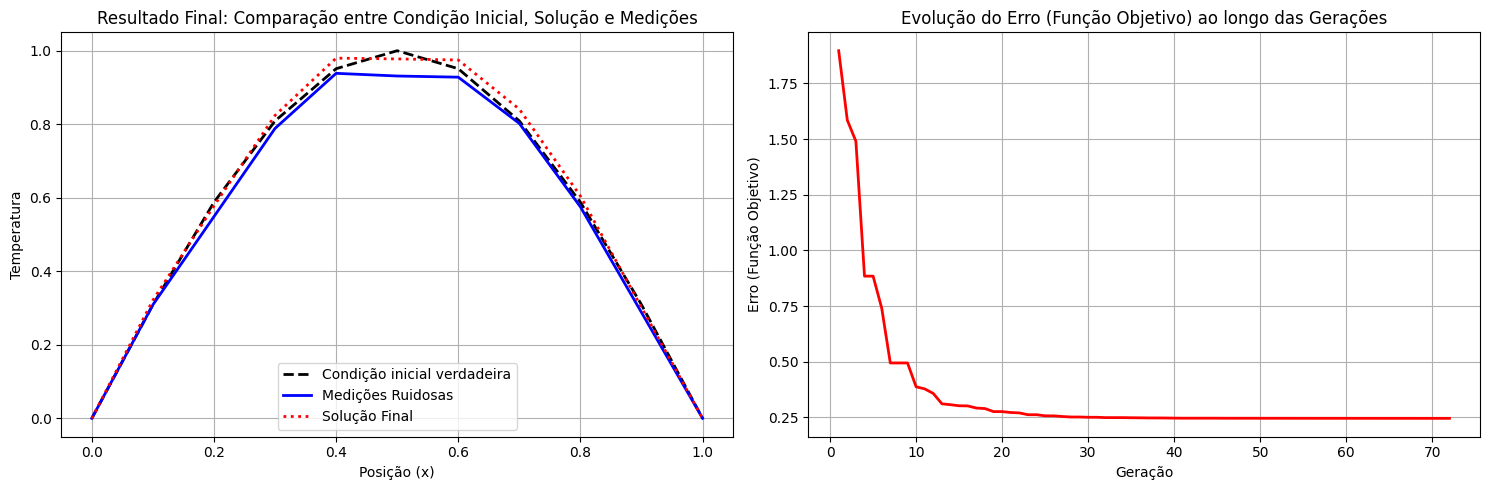

In [37]:
import matplotlib.pyplot as plt

# Visualização dos Resultados
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico 1: Melhor solução encontrada vs condição inicial verdadeira vs medições ruidosas
axes[0].plot(x, true_initial_condition, 'k--', label="Condição inicial verdadeira", linewidth=2)  # Condição inicial
axes[0].plot(x, best_solution, label="Medições Ruidosas", color='b', linewidth=2)  # Solução do problema de condução de calor
axes[0].plot(x, T_obs, label="Solução Final", color='r', linestyle='dotted', linewidth=2)  # Temperaturas com ruído
axes[0].set_title("Resultado Final: Comparação entre Condição Inicial, Solução e Medições")
axes[0].set_xlabel("Posição (x)")
axes[0].set_ylabel("Temperatura")
axes[0].legend()
axes[0].grid()

# Gráfico 2: Evolução do Erro (Função Objetivo) ao longo das Gerações
axes[1].plot(range(1, len(best_solutions) + 1), best_solutions, color='r', linewidth=2)  # Evolução do erro ao longo das gerações
axes[1].set_title("Evolução do Erro (Função Objetivo) ao longo das Gerações")
axes[1].set_xlabel("Geração")
axes[1].set_ylabel("Erro (Função Objetivo)")
axes[1].grid()

# Ajuste final e exibição dos gráficos
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
plt.show()


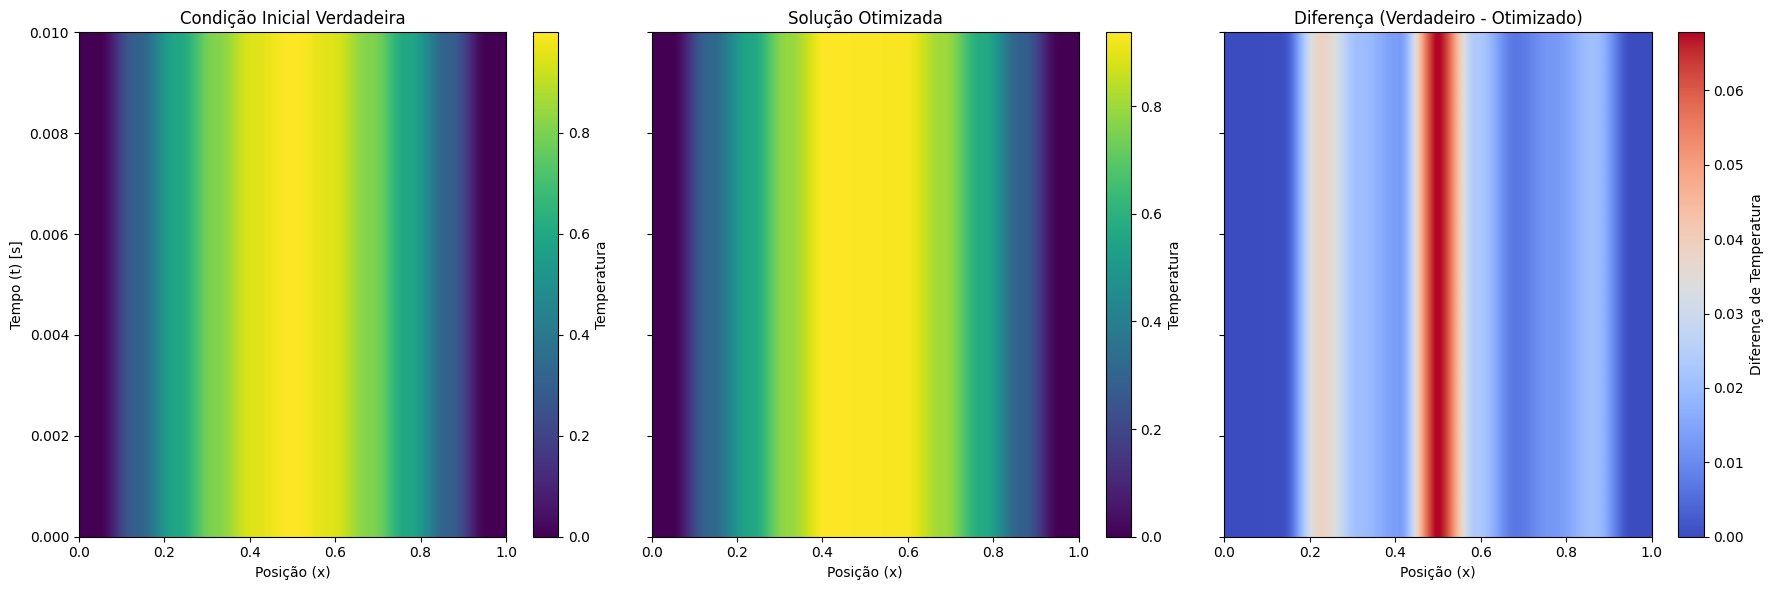

In [38]:
import matplotlib.pyplot as plt
import numpy as np

num_time_steps = 251

# Gerar as soluções para múltiplos tempos (evolução da temperatura)
true_values = np.array([
    solve_heat_equation(true_initial_condition, Lx, alpha, tau)
    for _ in range(num_time_steps)
])
optimized_values = np.array([
    solve_heat_equation(best_solution, Lx, alpha, tau)
    for _ in range(num_time_steps)
])

# Calcular a diferença entre as duas soluções
difference = true_values - optimized_values

# Criar figura para três gráficos lado a lado
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Gerar o eixo de tempo (linspace para ter o mesmo número de passos)
time_steps = np.linspace(0, tau, len(true_values[0]))

# Convertendo para 2D para uso com imshow
true_values_2d = np.tile(true_values, (len(time_steps), 1))  # Repetir as linhas para representar a evolução no tempo
optimized_values_2d = np.tile(optimized_values, (len(time_steps), 1))  # Repetir as linhas
difference_2d = np.tile(difference, (len(time_steps), 1))  # Repetir as linhas

# Heatmap da condição verdadeira
im1 = axes[0].imshow(true_values_2d, aspect='auto', cmap='viridis', extent=[0, Lx, 0, tau])
axes[0].set_title("Condição Inicial Verdadeira")
axes[0].set_xlabel("Posição (x)")
axes[0].set_ylabel("Tempo (t) [s]")
fig.colorbar(im1, ax=axes[0], label="Temperatura")

# Heatmap da solução otimizada
im2 = axes[1].imshow(optimized_values_2d, aspect='auto', cmap='viridis', extent=[0, Lx, 0, tau])
axes[1].set_title("Solução Otimizada")
axes[1].set_xlabel("Posição (x)")
fig.colorbar(im2, ax=axes[1], label="Temperatura")

# Heatmap da diferença
im3 = axes[2].imshow(difference_2d, aspect='auto', cmap='coolwarm', extent=[0, Lx, 0, tau])
axes[2].set_title("Diferença (Verdadeiro - Otimizado)")
axes[2].set_xlabel("Posição (x)")
fig.colorbar(im3, ax=axes[2], label="Diferença de Temperatura")

# Ajuste do layout
plt.tight_layout()
plt.show()


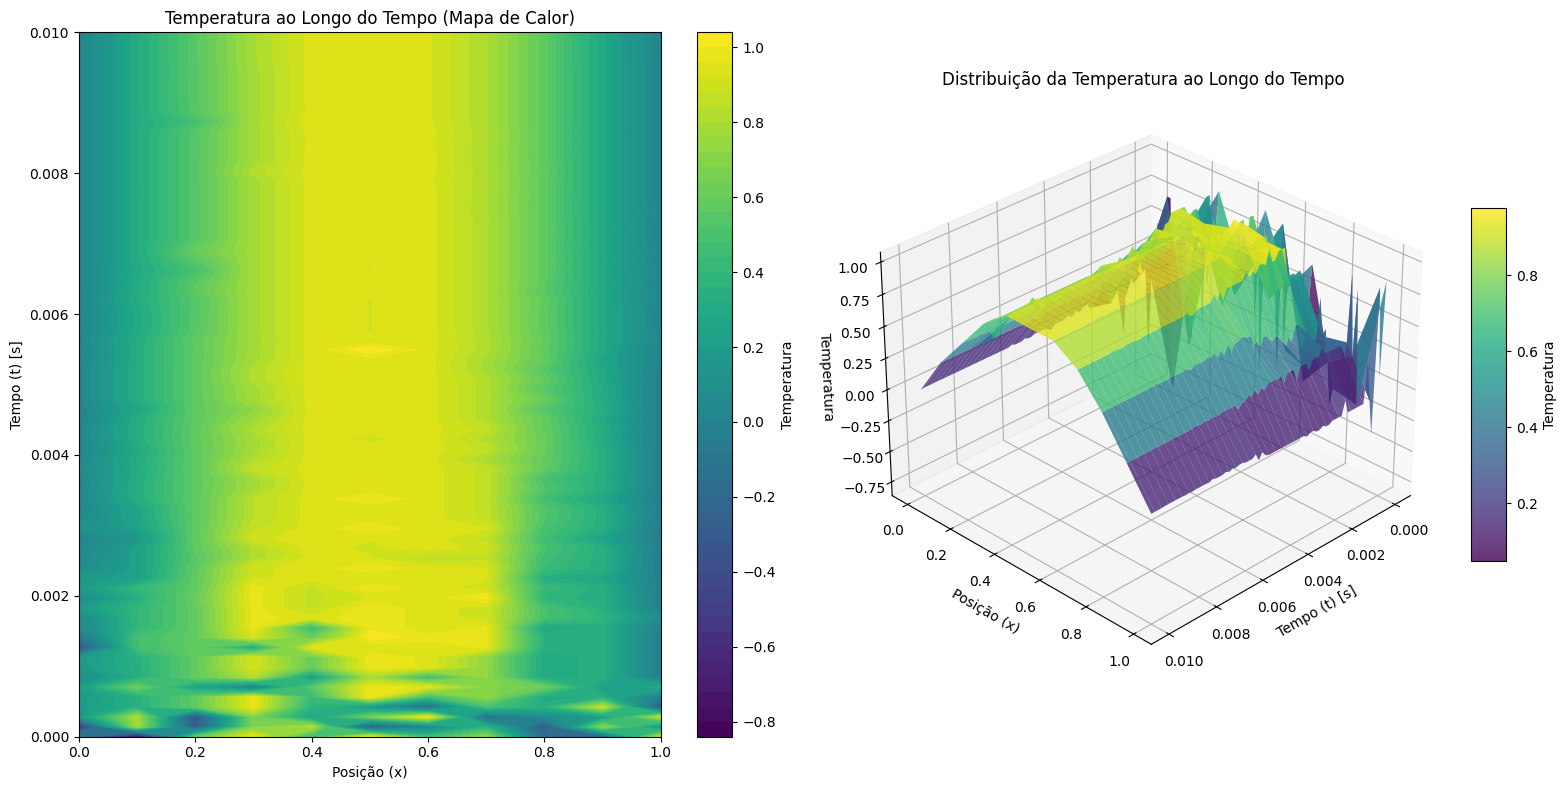

In [39]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Função para plotar a distribuição da temperatura em 3D
def plotar_3d_evolucao_temperaturas(x, time_steps, T_values, salvar_figuras=False):
    # Criando o meshgrid para os eixos x e t (tempo)
    X, T = np.meshgrid(x, time_steps)

    # Inicializando a figura e os subgráficos
    fig = plt.figure(figsize=(16, 8))

    # Subplot 1: Mapa de calor 2D
    ax1 = fig.add_subplot(121)
    c = ax1.contourf(x, time_steps, T_values, cmap='viridis', levels=50)
    fig.colorbar(c, ax=ax1, label="Temperatura")
    ax1.set_title("Temperatura ao Longo do Tempo (Mapa de Calor)")
    ax1.set_xlabel("Posição (x)")
    ax1.set_ylabel("Tempo (t) [s]")

    # Subplot 2: Superfície 3D
    ax2 = fig.add_subplot(122, projection='3d')
    surf = ax2.plot_surface(T, X, T_values, cmap='viridis', edgecolor='none', alpha=0.8)

    # Adicionando a barra de cores
    fig.colorbar(surf, ax=ax2, shrink=0.5, aspect=10).set_label('Temperatura')

    # Definindo rótulos e título para o gráfico 3D
    ax2.set_title("Distribuição da Temperatura ao Longo do Tempo")
    ax2.set_xlabel('Tempo (t) [s]')
    ax2.set_ylabel('Posição (x)')
    ax2.set_zlabel('Temperatura')

    # Ajustando o ângulo de visualização 3D
    ax2.view_init(elev=30, azim=45)

    # Salvando a figura, se necessário
    if salvar_figuras:
        plt.savefig('distribuicao_temperatura_lado_a_lado.png', format='png', dpi=1200, bbox_inches='tight')

    # Exibindo o gráfico
    plt.tight_layout()
    plt.show()

# Gerar o gráfico lado a lado com as variáveis 'x', 'time_steps' e 'T_values'
T_values = np.array(solutions_over_time)  # Asegure-se de que solutions_over_time tenha as dimensões corretas
time_steps = np.linspace(0, tau, len(T_values))  # Definindo os passos de tempo

# Plotando ambos os gráficos lado a lado
plotar_3d_evolucao_temperaturas(x, time_steps, T_values, salvar_figuras=True)


In [40]:
# Verificação das condições de contorno
def check_conditions(T_final, dx):
    """
    Verifica se as condições de contorno
    são satisfeitas nas extremidades da barra.
    As condições indicam derivadas nulas nas extremidades (fluxo de calor zero).
    """
    # Calcula as derivadas nas extremidades
    left_derivative = (T_final[1] - T_final[0]) / dx  # Derivada à esquerda (x=0)
    right_derivative = (T_final[-1] - T_final[-2]) / dx  # Derivada à direita (x=Lx)

    # Verifica se as derivadas são zero (aproximadamente, com uma tolerância)
    tolerance = 1e-5
    if abs(left_derivative) < tolerance:
        print(f"Condição de contorno satisfeita na extremidade esquerda (x=0): Derivada = {left_derivative:.5f}")
    else:
        print(f"Derivada na extremidade esquerda (x=0) = {left_derivative:.5f}")

    if abs(right_derivative) < tolerance:
        print(f"Condição de contorno satisfeita na extremidade direita (x=Lx): Derivada = {right_derivative:.5f}")
    else:
        print(f"Derivada na extremidade direita (x=Lx) = {right_derivative:.5f}")

    # Retorna os valores das derivadas para análise adicional
    return left_derivative, right_derivative

# Verificar após a solução do problema direto
left_d, right_d = check_conditions(best_solution, dx)


Derivada na extremidade esquerda (x=0) = 3.08900
Derivada na extremidade direita (x=Lx) = -2.87942
